In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
#Importing the training data
train=pd.read_csv("/kaggle/input/titanic/train.csv")
train.head()

# Checking for any missing values in the data 
train.isna().sum()

# Cabin column has 687, age has 177 and Embarked has 2 missing values.

#Missing value treatment for Age. Replacng missing age with mean value of age across differnt genders  
x=round(train.groupby(by='Sex').mean() ['Age'],0 )
x_female=x[0]
x_male=x[1]

#replacing the age nulls with repective Male avg and Female avg for null values 
train.loc[(train['Age'].isna()==True) & (train['Sex']=='male'), 'Age']=x_male
train.loc[(train['Age'].isna()==True) & (train['Sex']=='female'), 'Age']=x_female

# Missing value Percentage of the column "Cabin"= 77%
687/train.shape[0]* 100 
# eliminating the column from analysis, as this column values cannot be immuted  
train=train.drop('Cabin',1)

In [3]:
#There are 2 missing values in the Colum Embarked, whcih can be imputed 
mode_embarked=train['Embarked'].mode()
train.loc[train['Embarked'].isna()==True, 'Embarked']=mode_embarked[0]
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [4]:
#Number of unique Tickets 681
print(train['Ticket'].nunique())

#Number of unique passengers 891
print(train['PassengerId'].nunique())

#This concludes that one ticket Number was assigned to more than one passengers.

681
891


In [5]:
#Key Insight The maximum number of Passengers allowed on One Ticket Number 

# Generating a temporary table which shows repetation of Ticket across PassengerID
temp=train['Ticket'].value_counts()
temp=pd.DataFrame(data = temp.values, columns = ['Passenger_per_Ticket'], index=temp.index)
temp['Ticket']=temp.index

#The maximum number of Passenger that can be asigned with One Ticket Number is 7
print("The maximum number of Passenger that can be asigned with One Ticket Number is ")
print(temp['Passenger_per_Ticket'].max())

#Merging with the train table 
#train=pd.merge(train,temp,'left',on='Ticket')
del temp



The maximum number of Passenger that can be asigned with One Ticket Number is 
7


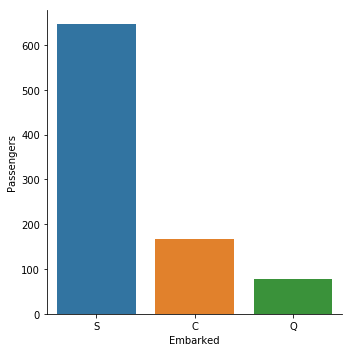

In [6]:
#Most of the passengers boarded the Titanic at Station 'S', followed by 'C' and 'Q'
temp=train['Embarked'].value_counts()
temp=pd.DataFrame(temp.values, columns=['Passengers'], index=temp.index)
temp['Embarked']=temp.index
sns.catplot('Embarked', 'Passengers', kind= 'bar', data=temp)
del temp


In [7]:
#Key Insights from the Table below show survival rate of men and women belonging to different calsses,
 #1) Passengers of Class 1 Women has highest Survivasl rate which is the highest and proves that high class Women were given most priority while rescuing 
 #2) Passengers of Class 3 has leat survival rate among all other classes 
x=train
#Calculating number of Passengers across class and Sex
passenger_count=x.groupby(['Pclass','Sex'])['PassengerId'].count().reset_index().rename(columns={"PassengerId": "Passengers"})

#Calculating number of Passengers across class and Sex who had survived
passenger_count_survived=x.groupby(['Pclass','Sex', 'Survived'])['PassengerId'].count().reset_index().rename(columns={"PassengerId": "Passengers_survived"})
passenger_count_survived=passenger_count_survived[(passenger_count_survived['Survived']==1)]

#Merging the two tables, to calculate survival rate 
passenger_count=pd.merge(passenger_count, passenger_count_survived, 'left', on=['Pclass','Sex'])
passenger_count['Survival_Rate(%)']=passenger_count['Passengers_survived']/passenger_count['Passengers']*100
print(passenger_count)
del passenger_count_survived, x
#Key Insights from the Table below show survival rate of men and women belonging to different calsses,
 #1) Passengers of Class 1 Women has highest Survivasl rate which is the highest and proves that high class Women were given most priority while rescuing 
 #2) Passengers of Class 3 has leat survival rate among all other classes 


   Pclass     Sex  Passengers  Survived  Passengers_survived  Survival_Rate(%)
0       1  female          94         1                   91         96.808511
1       1    male         122         1                   45         36.885246
2       2  female          76         1                   70         92.105263
3       2    male         108         1                   17         15.740741
4       3  female         144         1                   72         50.000000
5       3    male         347         1                   47         13.544669


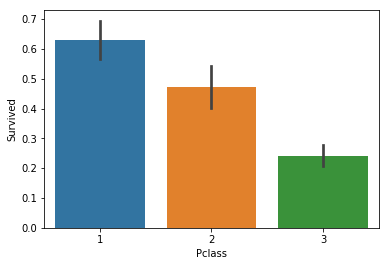

In [8]:
#Survival across different Classes
sns.barplot(x='Pclass', y ='Survived',data = train);

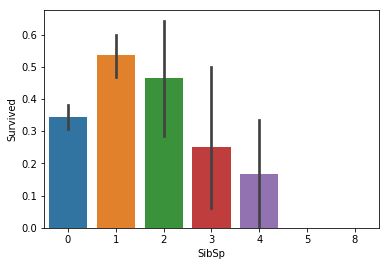

In [9]:
#Survival across different Number of Sibling and Spouse
sns.barplot(x = 'SibSp', y = 'Survived', data = train);

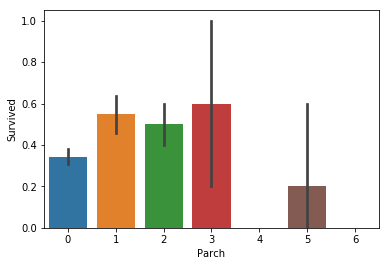

In [10]:
#Survival across different Number of Parents or Children
sns.barplot(x = 'Parch', y = 'Survived', data = train);

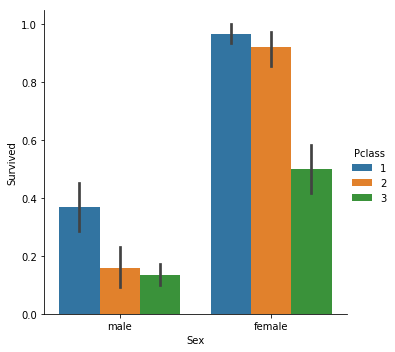

In [11]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=train)
# The bellow graph, shows persons of higher class have high survival rate when compared to other classes

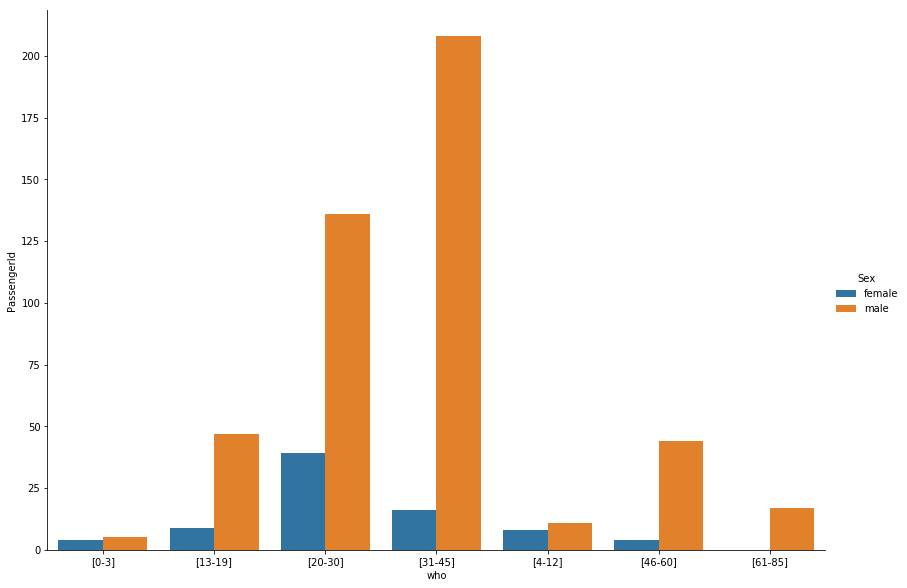

In [12]:
#Key Insights 
#1) Males belonging to age group of 31-45 have died the most
#Creating new column describing whether child, man or woman
train.loc[((train['Age']>0) & (train['Age']<3)), 'who']='[0-3]'
train.loc[((train['Age']>3) & (train['Age']<13) ), 'who']='[4-12]'
train.loc[((train['Age']>13) & (train['Age']<=19) ), 'who']='[13-19]'
train.loc[((train['Age']>19) & (train['Age']<=30) ), 'who']='[20-30]'
train.loc[((train['Age']>30) & (train['Age']<=45) ), 'who']='[31-45]'
train.loc[((train['Age']>45) & (train['Age']<=60) ), 'who']='[46-60]'
train.loc[((train['Age']>60) & (train['Age']<=85) ), 'who']='[61-85]'
#train.loc[(train['Age']>85) , 'who']='[>85]'
x=train[(train['Survived']==0)]
x=x.groupby(['Sex','who'])['PassengerId'].count().reset_index().sort_values('who')
#The  below graph shows that man has survived the least, Woman and Children have survived the most 
sns.catplot(x="who", y="PassengerId", kind="bar", hue='Sex',data=x, height=8.27, aspect=11.7/8.27,order=x['who'].unique())


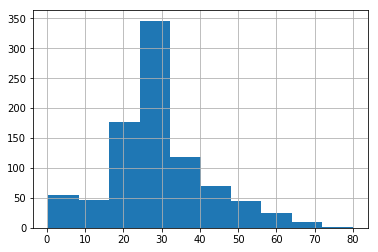

In [13]:
#Most passengers are aged between 25 and 30
train.Age.hist()

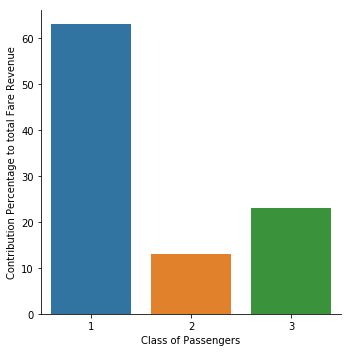

In [14]:
x=train.groupby(['Pclass']).agg({ 'Fare': sum, 'PassengerId': "count"}).reset_index()
x.Fare=x.Fare.round()
x=x.rename(columns={"PassengerId":"Passenger_count"})
x['Fare_Contri']=x['Fare']/x.Fare.sum()*100
x['Passenger_Contri']=x['Passenger_count']/x.Passenger_count.sum()*100
x.Fare_Contri=x.Fare_Contri.round()
x.Passenger_Contri=x.Passenger_Contri.round()
sns.catplot(x="Pclass", y="Fare_Contri", kind="bar", data=x).set(xlabel="Class of Passengers", ylabel="Contribution Percentage to total Fare Revenue")



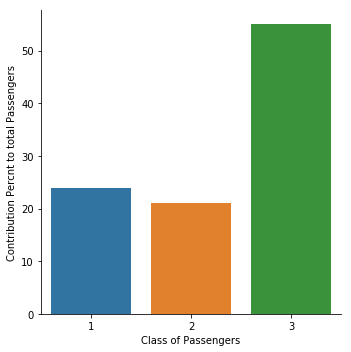

In [15]:
sns.catplot(x="Pclass", y="Passenger_Contri", kind="bar", data=x).set(xlabel="Class of Passengers", ylabel="Contribution Percnt to total Passengers")
del x

In [16]:
#Key Insights from above two Graphs 
#1) About 63% of revenue is generated from the class 1, which has only 24% of the population.
#2) This shows Top class 1 passengers have contributed the most for revenue.
#3) Then comes the class 3 which contributes 23% of revenue generated from 55% of population.
#4) Most of the people haven't shown intrest in Second class, Only just 21% of population opted to Second class.

0    549
1    342
Name: Survived, dtype: int64


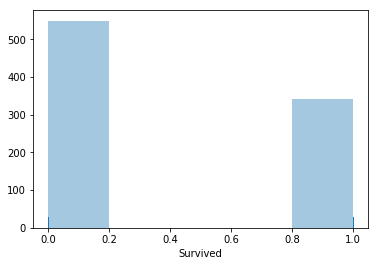

In [17]:
print(train['Survived'].value_counts())
sns.distplot(train['Survived'], kde=False, rug=True)
#the dependent variable is slightly Skew, Only 38% of passenger have survived.
#This maked our model to skewed towards predicting mostly unsurvived 
# to solve this we will use Stratified Cross validation method 

In [18]:
training_data=pd.DataFrame(data=train[['Pclass','Survived','Sex','Age','SibSp','Parch','Embarked','who']])

In [19]:
#Creating the Dummy Columns for Categorical Variables
training_data=pd.get_dummies(training_data,columns=['Pclass','Sex','Embarked','who'])

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [21]:
y=pd.DataFrame(data=training_data['Survived'])
X=training_data
X=X.drop(columns='Survived')
print(y.shape, X.shape)

(891, 1) (891, 18)


In [22]:
#Balancing the Classes of the dataset
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y)
os_data_y['y']=os_data_y['Survived']
os_data_y=os_data_y.drop(columns='Survived')

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  762
Number of no subscription in oversampled data 381
Number of subscription 381
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [24]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.430010
         Iterations 10
                               Results: Logit
Model:                   Logit               Pseudo R-squared:    0.354     
Dependent Variable:      Survived            AIC:                 798.2773  
Date:                    2020-03-29 09:27    BIC:                 874.9548  
No. Observations:        891                 Log-Likelihood:      -383.14   
Df Model:                15                  LL-Null:             -593.33   
Df Residuals:            875                 LLR p-value:         3.5852e-80
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          10.0000                                            
----------------------------------------------------------------------------
             Coef.    Std.Err.      z    P>|z|      [0.025         0.975]   
----------------------------------------------------------------------------
Age 

In [26]:
print(list(os_data_X))
X=os_data_X
y=os_data_y['y']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

['Age', 'SibSp', 'Parch', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'who_[0-3]', 'who_[13-19]', 'who_[20-30]', 'who_[31-45]', 'who_[4-12]', 'who_[46-60]', 'who_[61-85]']
Optimization terminated successfully.
         Current function value: 0.452954
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.347     
Dependent Variable: y                AIC:              726.3016  
Date:               2020-03-29 09:28 BIC:              809.7486  
No. Observations:   762              Log-Likelihood:   -345.15   
Df Model:           17               LL-Null:          -528.18   
Df Residuals:       744              LLR p-value:      2.2489e-67
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[101  18]
 [ 18  92]]


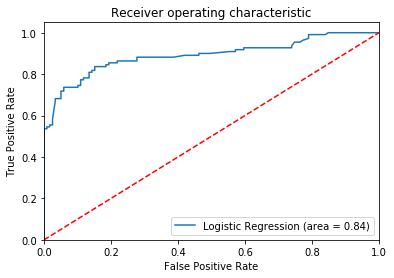

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [32]:
test=pd.read_csv("/kaggle/input/titanic/test.csv")
test=test.set_index("PassengerId")
x=round(test.groupby(by='Sex').mean() ['Age'],0 )
x_female=x[0]
x_male=x[1]

#replacing the age nulls with repective Male avg and Female avg for null values 
test.loc[(test['Age'].isna()==True) & (test['Sex']=='male'), 'Age']=x_male
test.loc[(test['Age'].isna()==True) & (test['Sex']=='female'), 'Age']=x_female

In [33]:
#Preparing test data in the same form of Train data
test.head()
test.loc[((test['Age']>0) & (test['Age']<3)), 'who']='[0-3]'
test.loc[((test['Age']>3) & (test['Age']<13) ), 'who']='[4-12]'
test.loc[((test['Age']>13) & (test['Age']<=19) ), 'who']='[13-19]'
test.loc[((test['Age']>19) & (test['Age']<=30) ), 'who']='[20-30]'
test.loc[((test['Age']>30) & (test['Age']<=45) ), 'who']='[31-45]'
test.loc[((test['Age']>45) & (test['Age']<=60) ), 'who']='[46-60]'
test.loc[((test['Age']>60) & (test['Age']<=85) ), 'who']='[61-85]'
test.head()
test=pd.get_dummies(test,columns=["Pclass", "Sex", "who","Embarked",])

In [35]:
test.head()
cols=list(X_train)
print(list(test))
test=test[cols]
#Predicting the results 
test['Survived']=logreg.predict(test)

['Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'who_[0-3]', 'who_[13-19]', 'who_[20-30]', 'who_[31-45]', 'who_[4-12]', 'who_[46-60]', 'who_[61-85]', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


ValueError: could not convert string to float: 'Kelly, Mr. James'

In [ ]:
#Exporting the results 
import csv
test['PassengerId']=test.index
cols=["PassengerId","Survived"]
test=test[cols]
submission=pd.DataFrame(data=test )
submission=submission.reset_index(drop=True)
submission.to_csv('Submission.csv', index=False) 